VV - Very Small: r=-0.021, p=0.8565
VV - Small: r=0.246, p=0.0227
VV - Medium: r=0.199, p=0.3286
VV - Large: r=0.537, p=0.1357
HH - Very Small: r=-0.334, p=0.0026
HH - Small: r=-0.214, p=0.0476
HH - Medium: r=-0.299, p=0.1372
HH - Large: r=0.337, p=0.3747
VH - Very Small: r=-0.064, p=0.5732
VH - Small: r=0.113, p=0.2995
VH - Medium: r=0.234, p=0.2496
VH - Large: r=0.767, p=0.0159


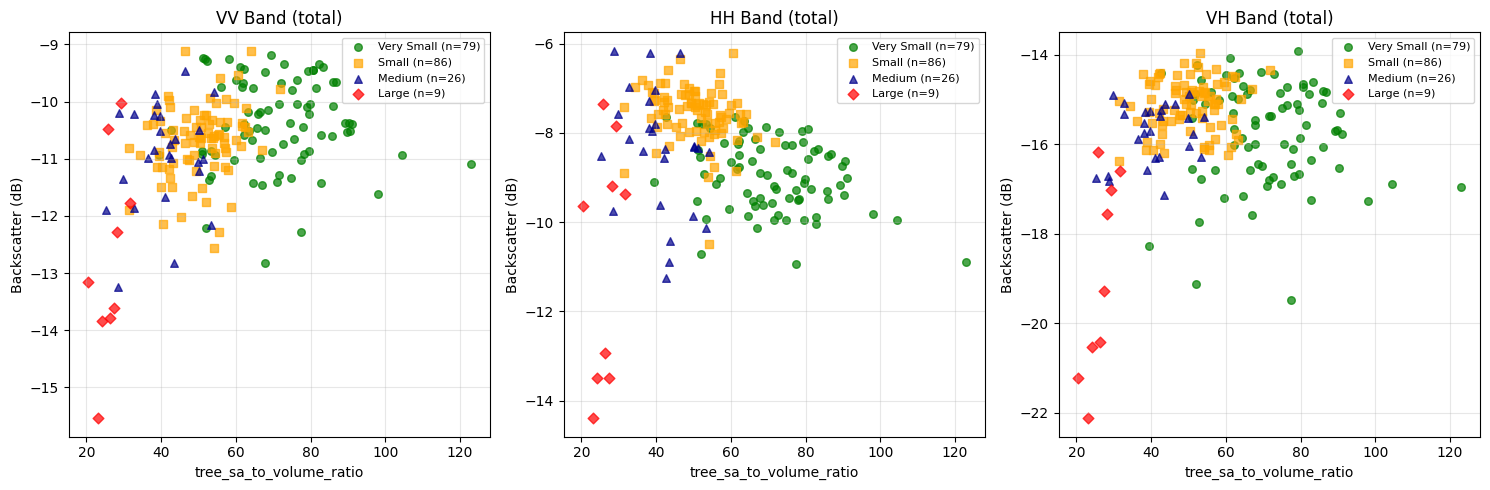

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def analyze_sa_ratio(csv_file, x_param='tree_sa_to_volume_ratio', backscatter_type='total', frequency=0.43, angle=30, soil_moisture=0.5, canopy_density=0.015):
    """Analyze surface area to volume ratio vs backscatter by tree size"""
    df = pd.read_csv(csv_file)
    
    # Filter by frequency and angle
    df = df[(df['frequency'] == frequency) & (df['theta'] == angle) & (df['soil_moisture'] == soil_moisture)]
    
    # Filter by canopy density if specified
    if canopy_density is not None:
        df = df[df['canopy_density'] == canopy_density]
    
    # Define backscatter columns based on type
    vv_col = f'{backscatter_type}_vv'
    hh_col = f'{backscatter_type}_hh'
    vh_col = f'{backscatter_type}_vh'
    
    # Clean data - avoid duplicate columns
    cols = ['total_tree_volume', vv_col, hh_col, vh_col]
    if x_param not in cols:
        cols.insert(1, x_param)
    df = df[cols].dropna()
    df = df[(df['total_tree_volume'] > 0) & (df[x_param] > 0)]
    
    # Define volume subgroups
    subgroups = {
        'Very Small': (0.05, 0.2),
        'Small': (0.2, 0.8),
        'Medium': (0.8, 2.5),
        'Large': (2.5, float('inf'))
    }
    
    # Create plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    bands = [(vv_col, 'VV'), (hh_col, 'HH'), (vh_col, 'VH')]
    colors = ['green', 'orange', 'darkblue', 'red']
    markers = ['o', 's', '^', 'D']
    
    for ax, (band_col, band_name) in zip(axes, bands):
        for idx, (name, (vmin, vmax)) in enumerate(subgroups.items()):
            # Filter subgroup
            if vmax == float('inf'):
                sub_df = df[df['total_tree_volume'] >= vmin]
            else:
                sub_df = df[(df['total_tree_volume'] >= vmin) & (df['total_tree_volume'] < vmax)]
            
            if len(sub_df) > 5:
                # Plot
                ax.scatter(sub_df[x_param], sub_df[band_col],
                          c=colors[idx], marker=markers[idx], alpha=0.7, s=30,
                          label=f'{name} (n={len(sub_df)})')
                
                # Calculate correlation
                r, p = pearsonr(sub_df[x_param], sub_df[band_col])
                print(f"{band_name} - {name}: r={r:.3f}, p={p:.4f}")
        
        ax.set_xlabel(x_param)
        ax.set_ylabel('Backscatter (dB)')
        ax.set_title(f'{band_name} Band ({backscatter_type})')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'{x_param}_{backscatter_type}_analysis_{frequency}GHz_{angle}deg.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run analysis
csv_file = r"/home/ucfargt@ad.ucl.ac.uk/Documents/mimics/model_output.csv"

"""
    x_param = 
    backscatter_type = 
    frequency_values = [0.43]
    canopy_density_values = [0.015, 0.06, 0.24, 0.48, 0.72]
    soil_moisture_values = [0.3, 0.5, 0.7]  
"""


# Use total backscatter
analyze_sa_ratio(csv_file, x_param='tree_sa_to_volume_ratio', backscatter_type='total', frequency=0.43, angle=30, soil_moisture=0.5, canopy_density=0.015)
